In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
#import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data
df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [4]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
df.shape

(1000, 17)

In [8]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [13]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [14]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [15]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [16]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [17]:
df['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [18]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [19]:
df = df.drop('Date', axis=1)

In [20]:
df = df.drop('Time', axis=1)

In [21]:
df = df.drop('gross margin percentage', axis=1)

In [22]:
categorical = ['Branch','City','Customer type','Gender','Product line','Payment']
numerical = ['Rating','gross income','cogs','Total','Tax 5%','Unit price']

In [23]:
#outlier
from scipy import stats

In [24]:
print (f'jumlah baris sebelum melfilter outlier: {len(df)}')
filtered_enteries = np.array([True] * len(df))

jumlah baris sebelum melfilter outlier: 1000


In [25]:
for col in numerical:
    zscore = abs(stats.zscore(df[col]))
    filtered_enteries = (zscore<3) & filtered_enteries

df2=df[filtered_enteries]
print (f'jumlah baris sesudah melfilter outlier: {len(df2)}')

jumlah baris sesudah melfilter outlier: 1000


In [26]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


In [27]:
df_num = df[numerical]
df_num

,Rating,gross income,cogs,Total,Tax 5%,Unit price
0,9.1,26.1415,522.83,548.9715,26.1415,74.69
1,9.6,3.8200,76.40,80.2200,3.8200,15.28
2,7.4,16.2155,324.31,340.5255,16.2155,46.33
3,8.4,23.2880,465.76,489.0480,23.2880,58.22
4,5.3,30.2085,604.17,634.3785,30.2085,86.31
...,...,...,...,...,...,...
995,6.2,2.0175,40.35,42.3675,2.0175,40.35
996,4.4,48.6900,973.80,1022.4900,48.6900,97.38
997,7.7,1.5920,31.84,33.4320,1.5920,31.84
998,4.1,3.2910,65.82,69.1110,3.2910,65.82


In [28]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR=Q3-Q1
low_limit = Q1-(IQR*1.5)
high_limit = Q3 +(IQR*1.5)

In [29]:
x=((df_num < low_limit) | (df_num > high_limit))
x['res']=x.any(axis=1)
x

,Rating,gross income,cogs,Total,Tax 5%,Unit price,res
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,True,True,True,True,False,True
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [30]:
df=df[df.index.isin(x[x.res==False].index.tolist())]
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,Ewallet,60.95,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,3.2910,4.1


In [31]:
df['Total'].values

array([548.9715,  80.22  , 340.5255, 489.048 , 634.3785, 627.6165,
       433.692 , 772.38  ,  76.146 , 172.746 ,  60.816 , 107.142 ,
       246.4875, 453.495 , 749.49  , 590.436 , 506.6355, 457.443 ,
       172.2105,  84.63  , 451.71  , 277.137 ,  69.72  , 181.44  ,
       279.1845, 441.756 ,  35.196 , 184.107 , 463.89  , 235.2105,
       494.1825, 737.7615, 703.752 , 202.818 , 417.564 ,  71.526 ,
       328.755 , 575.316 , 461.328 , 253.008 ,  91.056 , 117.831 ,
       435.456 , 829.08  ,  32.277 , 394.632 , 535.7205, 189.0945,
       119.259 , 867.615 , 671.79  , 234.0975,  75.054 ,  16.2015,
        33.936 , 722.232 ,  93.114 , 752.64  , 759.675 , 192.843 ,
        77.931 , 351.099 , 520.4115, 166.005 , 318.108 , 166.635 ,
        70.287 , 614.943 , 827.085 ,  19.2465, 939.54  , 652.26  ,
       152.838 , 478.233 , 705.6315, 437.325 , 463.428 , 189.0945,
       822.255 , 106.995 , 624.897 , 304.542 , 161.7   , 337.512 ,
       256.7775, 610.491 , 401.73  , 362.943 ,  44.5935, 485.0

In [32]:
corr = df.corr()

print(corr)

              Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price      1.000000 -0.011506  0.623355  0.623355  0.623355   
Quantity       -0.011506  1.000000  0.699290  0.699290  0.699290   
Tax 5%          0.623355  0.699290  1.000000  1.000000  1.000000   
Total           0.623355  0.699290  1.000000  1.000000  1.000000   
cogs            0.623355  0.699290  1.000000  1.000000  1.000000   
gross income    0.623355  0.699290  1.000000  1.000000  1.000000   
Rating         -0.002527 -0.009694 -0.026092 -0.026092 -0.026092   

              gross income    Rating  
Unit price        0.623355 -0.002527  
Quantity          0.699290 -0.009694  
Tax 5%            1.000000 -0.026092  
Total             1.000000 -0.026092  
cogs              1.000000 -0.026092  
gross income      1.000000 -0.026092  
Rating           -0.026092  1.000000  


<AxesSubplot:>

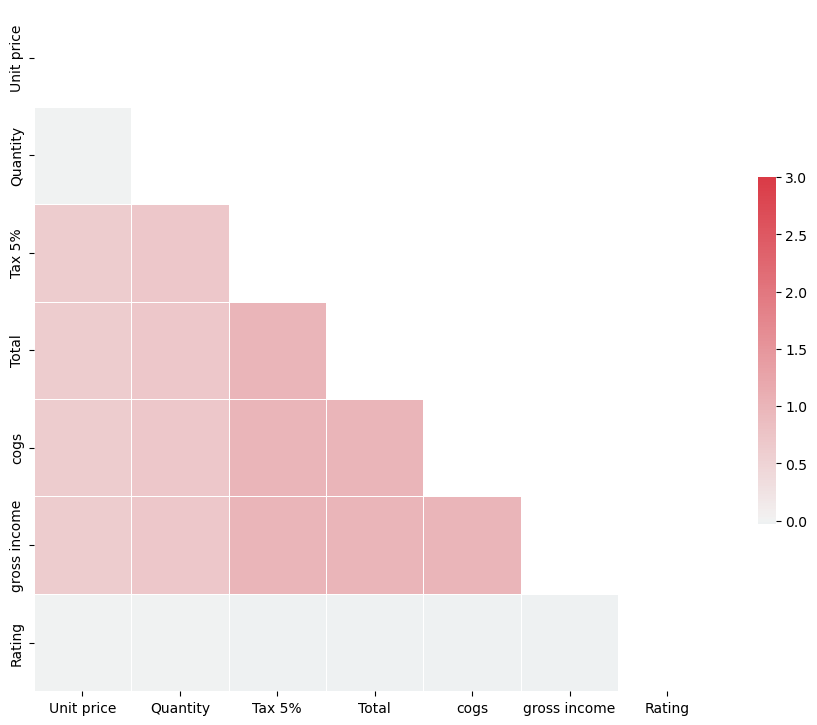

In [33]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure 
f, ax = plt.subplots(figsize=(11, 9))

# generate a custome diverging colormap 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [34]:
from scipy.stats import chi2_contingency

# create a contingency table of the dataframe
contingency_table = pd.crosstab(df['Product line'], df['Gender'])

# calculate the chi_squared statistic and p-value 
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print(f'Chi-squared statistic: {round(chi2, 4)}', f'p-value: {p}')

Chi-squared statistic: 5.4388 p-value: 0.36470640328532566


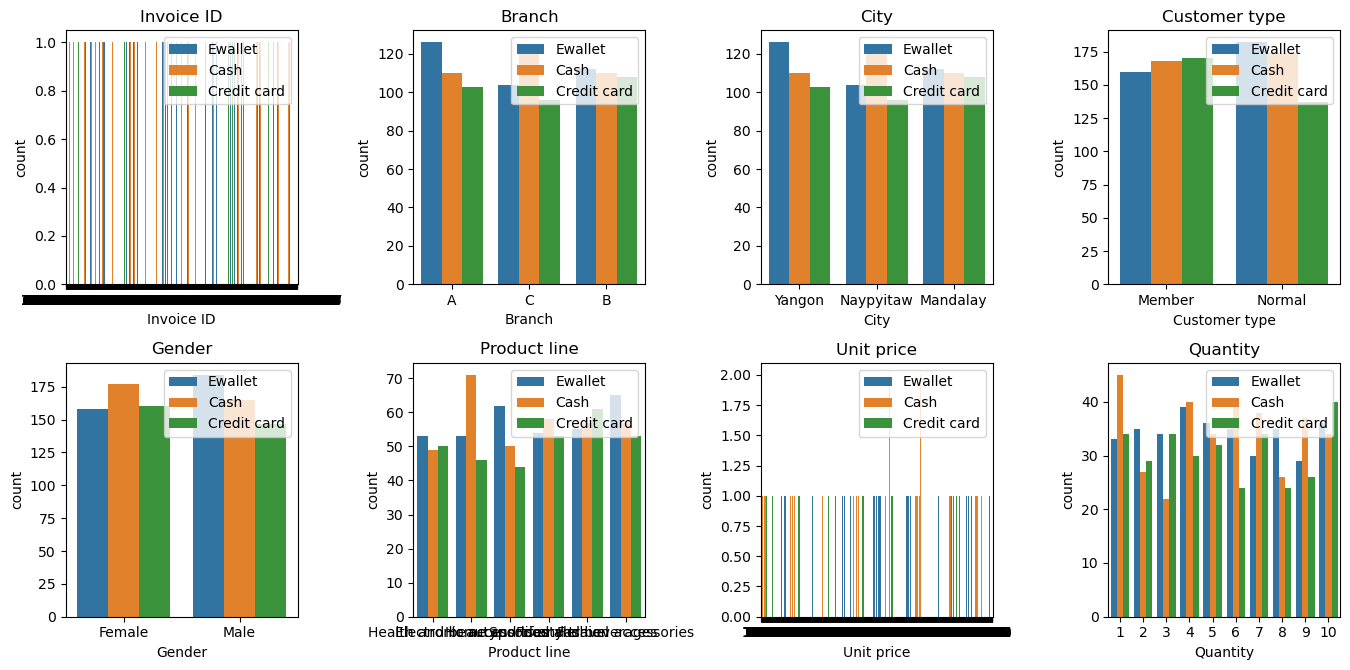

In [35]:
col=df.columns

n_rows=2
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.4,n_rows*3.4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(x=df[col[i]],data=df,hue=df["Payment"],ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

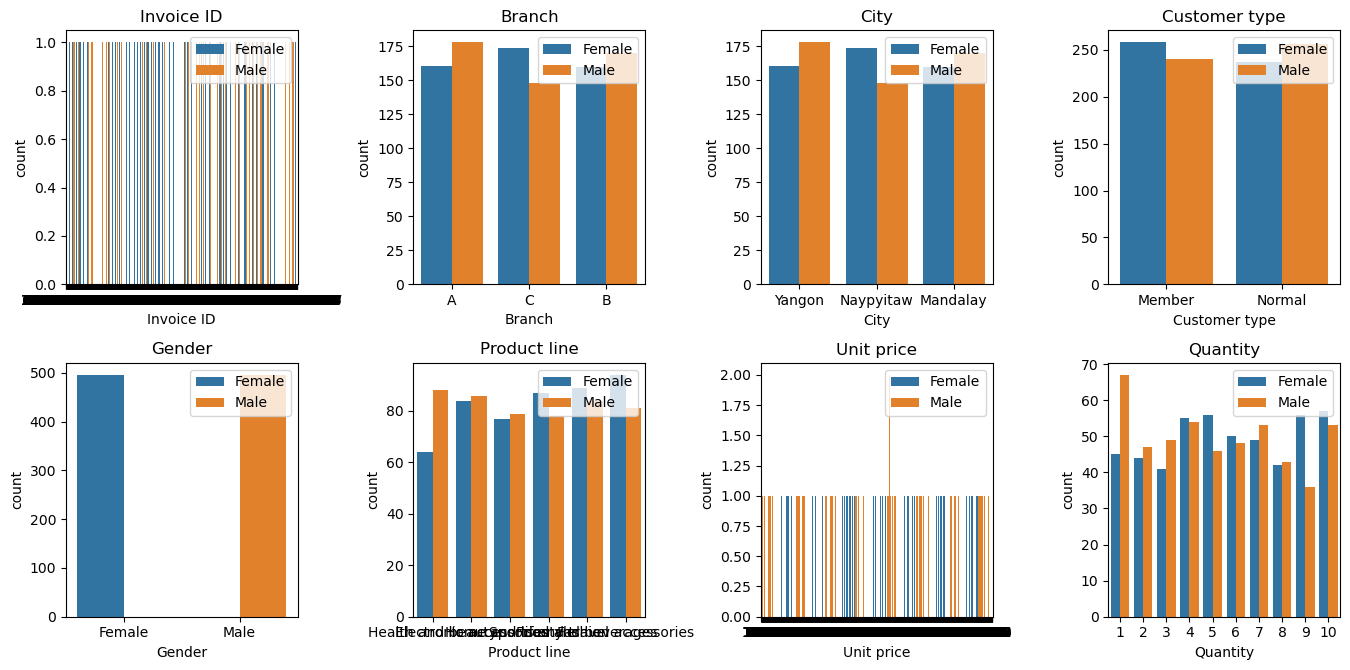

In [36]:
col=df.columns

n_rows=2
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.4,n_rows*3.4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(x=df[col[i]],data=df,hue=df["Gender"],ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

In [37]:
df2 = df.corr()
df2

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
Total,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,-0.026092,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e33f8e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e33fbbe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e33f9cd50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9e33fb04d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e33ed2b10>,
 'means': []}

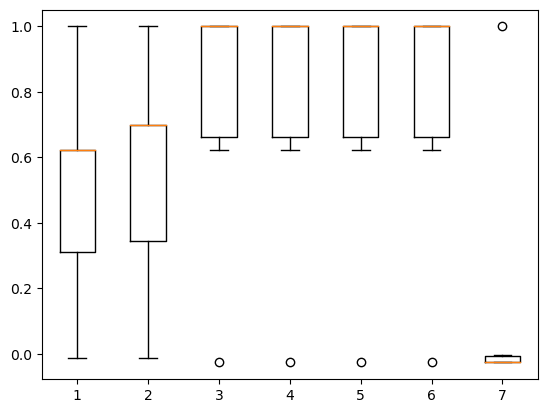

In [38]:
plt.boxplot(df2)

<AxesSubplot:>

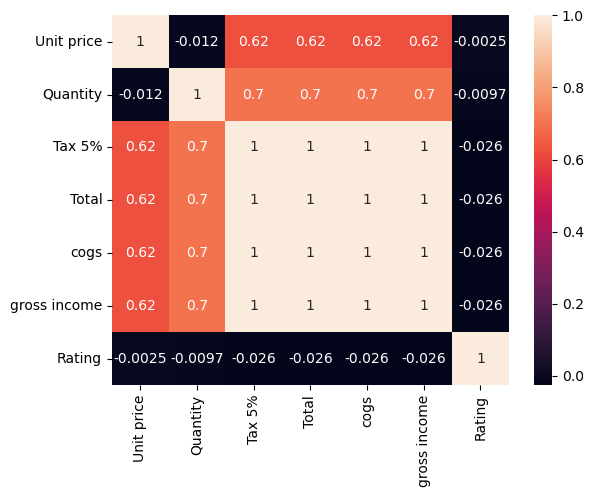

In [39]:
sns.heatmap(df.corr(),annot=True)

col:Rating


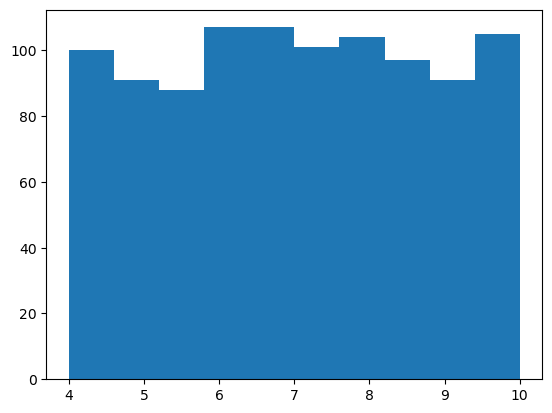

col:gross income


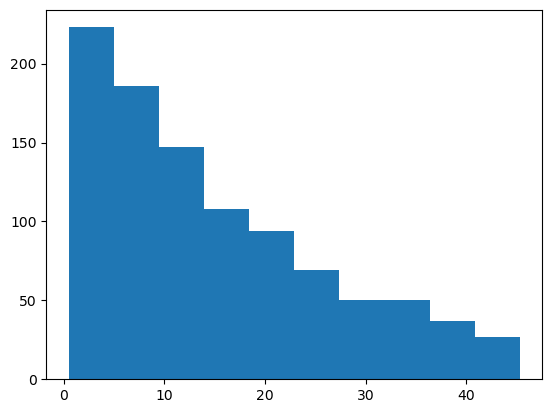

col:cogs


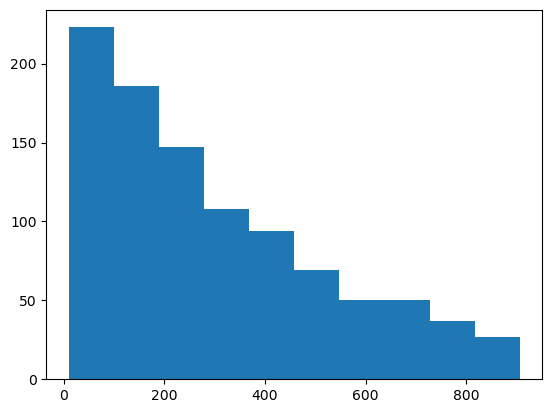

col:Total


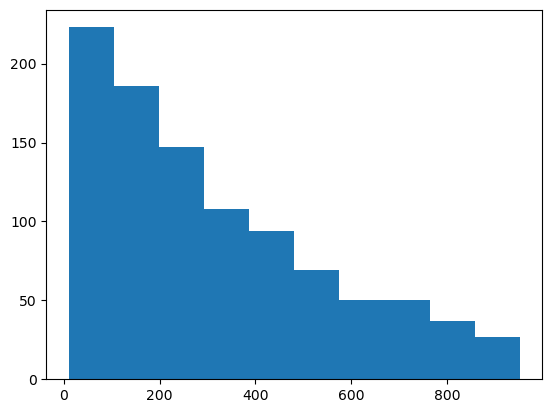

col:Tax 5%


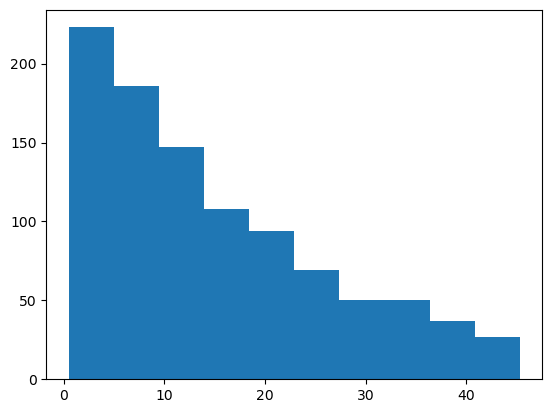

col:Unit price


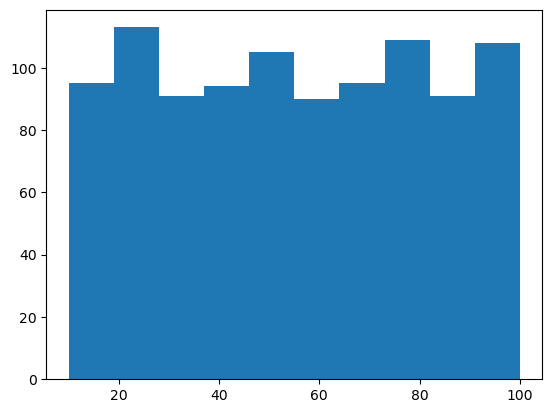

In [40]:
for x in numerical:
    plt.hist(df[x])
    print('col:'+ x)
    plt.show()

# FEATURE SCALING

In [41]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,55.292482,5.469223,15.076417,316.604752,301.528335,15.076417,6.979717
std,26.311619,2.905031,11.319504,237.709589,226.390085,11.319504,1.716957
min,10.080000,1.000000,0.508500,10.678500,10.170000,0.508500,4.000000
25%,32.665000,3.000000,5.817500,122.167500,116.350000,5.817500,5.500000
50%,54.840000,5.000000,12.036000,252.756000,240.720000,12.036000,7.000000
75%,77.485000,8.000000,22.127000,464.667000,442.540000,22.127000,8.500000
max,99.960000,10.000000,45.325000,951.825000,906.500000,45.325000,10.000000


In [42]:
numerical

['Rating', 'gross income', 'cogs', 'Total', 'Tax 5%', 'Unit price']

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical].values)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.737595,7,0.978017,0.978017,Ewallet,0.978017,0.978017,1.235531
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-1.521483,5,-0.994929,-0.994929,Cash,-0.994929,-0.994929,1.526891
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,-0.340800,7,0.100681,0.100681,Credit card,0.100681,0.100681,0.244907
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,0.111319,8,0.725803,0.725803,Ewallet,0.725803,0.725803,0.827627
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,1.179448,7,1.337490,1.337490,Ewallet,1.337490,1.337490,-0.978805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,0.215128,1,-1.063208,-1.063208,Ewallet,-1.063208,-1.063208,-0.629173
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,-0.568191,1,-1.154248,-1.154248,Ewallet,-1.154248,-1.154248,-0.454357
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,-0.891786,1,-1.191857,-1.191857,Cash,-1.191857,-1.191857,0.419723
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,0.400311,1,-1.041686,-1.041686,Cash,-1.041686,-1.041686,-1.678068


In [44]:
df[numerical].describe()

,Rating,gross income,cogs,Total,Tax 5%,Unit price
count,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02
mean,3.190631e-16,-3.226481e-17,-4.122725e-17,-1.433991e-16,-3.226481e-17,1.649090e-16
std,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00
min,-1.736340e+00,-1.287625e+00,-1.287625e+00,-1.287625e+00,-1.287625e+00,-1.719214e+00
25%,-8.622607e-01,-8.183743e-01,-8.183743e-01,-8.183743e-01,-8.183743e-01,-8.604148e-01
50%,1.181904e-02,-2.687354e-01,-2.687354e-01,-2.687354e-01,-2.687354e-01,-1.720574e-02
75%,8.858988e-01,6.231848e-01,6.231848e-01,6.231848e-01,6.231848e-01,8.438752e-01
max,1.759978e+00,2.673603e+00,2.673603e+00,2.673603e+00,2.673603e+00,1.698492e+00


# Market Basket Analysis with Apriori Algorithm

In [45]:
#import all required packages..
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [46]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.737595,7,0.978017,0.978017,Ewallet,0.978017,0.978017,1.235531
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-1.521483,5,-0.994929,-0.994929,Cash,-0.994929,-0.994929,1.526891
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,-0.340800,7,0.100681,0.100681,Credit card,0.100681,0.100681,0.244907
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,0.111319,8,0.725803,0.725803,Ewallet,0.725803,0.725803,0.827627
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,1.179448,7,1.337490,1.337490,Ewallet,1.337490,1.337490,-0.978805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,0.215128,1,-1.063208,-1.063208,Ewallet,-1.063208,-1.063208,-0.629173
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,-0.568191,1,-1.154248,-1.154248,Ewallet,-1.154248,-1.154248,-0.454357
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,-0.891786,1,-1.191857,-1.191857,Cash,-1.191857,-1.191857,0.419723
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,0.400311,1,-1.041686,-1.041686,Cash,-1.041686,-1.041686,-1.678068


In [47]:
df[df['Gender']=='Female']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.737595,7,0.978017,0.978017,Ewallet,0.978017,0.978017,1.235531
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-1.521483,5,-0.994929,-0.994929,Cash,-0.994929,-0.994929,1.526891
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,0.515147,6,0.492813,0.492813,Ewallet,0.492813,0.492813,-0.687445
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,0.694626,10,1.918330,1.918330,Ewallet,1.918330,1.918330,0.594539
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,-0.723714,2,-1.012076,-1.012076,Credit card,-1.012076,-1.012076,0.128363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,-1.541256,2,-1.202110,-1.202110,Ewallet,-1.202110,-1.202110,-1.561524
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,0.048198,5,-0.082768,-0.082768,Credit card,-0.082768,-0.082768,-1.444980
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,0.810223,10,2.052679,2.052679,Ewallet,2.052679,2.052679,-0.570901
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,0.215128,1,-1.063208,-1.063208,Ewallet,-1.063208,-1.063208,-0.629173


# MIXTEND 

In [48]:
!pip install mlxtend

In [49]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [50]:
#import data
df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [51]:
dataset = df

In [52]:
dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [53]:
# convert data in format which is required 
# converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=dataset,index='Invoice ID',columns='Product line',values='Quantity', aggfunc='sum',fill_value=0)

In [54]:
basket.head()

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Invoice ID,,,,,,
101-17-6199,0,0,7,0,0,0
101-81-4070,0,0,0,2,0,0
102-06-2002,0,0,0,0,0,5
102-77-2261,0,0,0,7,0,0
105-10-6182,0,2,0,0,0,0


In [55]:
#this to check correctness after binning it to 1 ..
basket['Electronic accessories'].head(10)

Invoice ID
101-17-6199    0
101-81-4070    0
102-06-2002    0
102-77-2261    0
105-10-6182    0
105-31-1824    0
106-35-6779    0
109-28-2512    0
109-86-4363    0
110-05-6330    0
Name: Electronic accessories, dtype: int64

In [56]:
# kita tidak membutuhkan jumlah kuantitas
# kita perlu mengambil atau tidak
# jadi jika pengguna telah mengambil tanda item itu sebagai 1 tanda lain sebagai 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [57]:
basket_sets = basket.applymap(convert_into_binary)

In [58]:
# check : has quantity now converted to 1 or 0.
basket_sets['Electronic accessories'].head(10)

Invoice ID
101-17-6199    0
101-81-4070    0
102-06-2002    0
102-77-2261    0
105-10-6182    0
105-31-1824    0
106-35-6779    0
109-28-2512    0
109-86-4363    0
110-05-6330    0
Name: Electronic accessories, dtype: int64

In [59]:
# call apriori function and pass minimum support here we are passing 7%. 
# means 7 times in total number of transaction the item should be present.
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [60]:
#it will generate frequent itemsets 
frequent_itemsets

,support,itemsets
0,0.170,(Electronic accessories)
1,0.178,(Fashion accessories)
2,0.174,(Food and beverages)
3,0.152,(Health and beauty)
4,0.160,(Home and lifestyle)
5,0.166,(Sports and travel)
